<hr style="border:1.5px solid gray">

# DATA3888 Final Report

<hr style="border:1.5px solid gray">

## Optiver 1

---
SIDs: 520434835, 520011315, 




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Executive Summary

Financial markets are complicated systems where participants buy or sell financial instruments, such as stocks, bonds, derivatives, currencies and commodities, through a structured marketplace under regulatory oversight. Financial data provides a rich environment for data analysis through the investigation of market research, investment strategies, risk management, algorithmic trading, and predictive modelling. An order book provides one instance of a relatively simplistic dataset conveying the bid-ask prices and sizes of particular stocks at a given moment in the market. High-Frequency Trading (HFT) market makers like Optiver provide liquidity in the market to make small amounts of profit over large volumes of trades. For these trading firms, capturing price fluctuations of the products being traded is invaluable for their profits; through this report, we discuss the impact of feature engineering and clustering on the performance of model predictions.

Realised volatility is defined as the square root of the sum of consecutive log returns, calculated using the Weighted Average Price (WAP).
$$
WAP = \frac{\text{BidPrice}_1\cdot\text{AskSize}_1+\text{AskPrice}_1\cdot\text{BidSize}_1} {\text{BidSize}_1+\text{AskSize}_1}
$$

$$LogReturn = log{\frac{\text{WAP}_t-1}{\text{WAP}_1}}$$

$$\text{The volatility } \sigma \text{ of log return sequence } \mathbf{d} \\ \sigma = \sqrt{\sum_{i=1}^{n} d_i^2}$$




Symmetric Mean Absolute Percentage Error (SMAPE) <br/>
$${SMAPE} = 100 \times \text{mean}\left( \frac{\left|\text{prediction} - \text{test} \right|}{\frac{\left( \left| \text{test} \right| + \left| \text{prediction} \right| \right)}{2}} \right)$$

To develop more variables for our models in addition to the attributes in the stock datasets, we applied feature engineering on the bid and ask prices and sizes, creating various measures of spreads for the time ids. Through this, we compare our optimised linear regression model with a baseline linear model. The feature engineering variables were also used in our tree based models, Light GBM and Random Forest. Comparatively, time series models like GARCH and AutoRegressive Integrated Moving Average(ARIMA) were also developed. These various models were developed and compared to determine the prediction of volatility with the highest accuracy whilst reducing the error rate.
 
*Write something on clustering?*

Our final product for traders to utilise is an interactive shiny application that allows users to upload stock data and visualise the predictive volatility through an optimised ensemble model that combines all models’ predictions and chooses the lowest accuracy.


# Method



### Machine learning models

#### Feature engineering


To capture the subtle relationships between our features and the target
variable (one-minute volatility), we calculated around 150 features, all
interpretable as measurements of liquidity or volatility from the previous 9
minutes data.

Initially, for each second, we calculated features to measure differences
between bid-ask prices, bid prices, and ask prices. We also computed price
features including WAP1 and WAP2, and used them with bid/ask prices to calculate
log returns.

After calculating these second-level features, we aggregated them using
different functions to capture various aspects of the data. For instance, for
log-return features of different prices, we used sum and realized volatility.
For price features, we used mean and standard deviation, etc. Additionally, we
applied four different aggregation ranges to capture time dependencies between
features and our target.

Furthermore, we used four different aggregation ranges to capture the time
dependence between features and our target. For instance, we created subsets of
specific time ranges to perform the aggregation. We started by aggregating
features over the entire past 9 minutes (540 seconds), then used subsets of the
past 6 minutes before the 9th minute, the past 3 minutes before the 9th minute,
and so on.

After completing the entire process, we generated 150 features for every
time-id in every stock-id, calculated based on the previous 540 seconds of data.
Our target variable was the volatility for the period between 540 and 600 seconds.
This thorough feature engineering process allowed us to capture essential
aspects of liquidity and volatility over different time frames, significantly
enhancing the predictive power of our model.

The whole process are performed using multiprocessing technique, which can
be solved by only 4 minutes for all stocks.


### Linear Regression


Given the high dimensionality of our dataset, to train a linear model, we
performed normalisation to make sure all the features contribute equally, and
perform a principal component analysis to reduce our feature space by computing
linear combination of our basic features maintain 95 percent of total variance,
while prevent the issue of multicollinearity. The out-of-fold SMAPE for this
model is 29.71

### Random Forest

We do not perform normalisation because random forest is not affected by
different ranges of features. The hyperparameter are determined by both
performance and running time. We determine the number of trees to be 50, and
features for each tree to be square root of number of original features to reduce
the risk of one feature dominate the trees. The out-of-fold SMAPE for this model
is 29.25

### LightGBM 


We chose the LightGBM (Light Gradient Boosting Machine) algorithm given the high-dimensional nature of our dataset, which includes detailed trading data for various stocks such as bid and ask prices, along with other transaction details.The LightGBM model is configured for predicting continuous values with carefully selected hyper-parameters to enhance performance and avoid overfitting. The model operates with a regression objective and a conservative learning rate of 0.01, ensuring slow, precise learning. Feature and data sampling are both set at 80%, using `colsample_bytree` and `subsample` respectively, to promote model robustness by reducing variance and preventing memorization. Trees are restricted to a depth of five to balance complexity with generalization. The `verbose` setting is minimized to streamline training, making it ideal for automated setups or integrated applications, focusing on efficient and effective stock volatility prediction.

Additionally, we utilized weighted training, applying varying importance to different segments of the data, particularly where there were significant fluctuations in stock prices, to focus the model on these critical areas.

Overall, the model demonstrated high accuracy and excellent performance compared to simpler models across various stocks, confirming the effectiveness of our approach in predicting stock market volatility.

### GARCH

The Generalized AutoRegressive Conditional Heteroskedasticity Model, known as the GARCH model is a statistical model used in analyzing time-series data where the variance error is believed to be serially autocorrelated [1]. The GARCH model we developed is the most well-known one as GARCH(1,1). The parameters in GARCH are named p and q, which represent the variance term, and squared residual term, respectively.
In Python, this model is imported from ‘arch_model’ in the arch module. Before the training, each log return is multiplied by 10^4 for better fitting. To meet our goal of predicting volatility in the future in one minute, the GARCH model is called by simulating 60 steps (as 60 seconds) 1000 times to ensure the results are not too variable. As a result, we have got a matrix of 60*1000 simulated log returns. The model-building process and the results are represented as follows.
Then, we calculate the volatility of each path and take the median value as the final prediction. The reason why we median is used because it is the best performanced result. The volatility predicted by the GARCH model can be calculated in many ways since the model only gives simulated log returns as a result. We developed four different ways to generate volatilities in this figure. One is from the axis of each step, and the other three are from the axis of each path in the simulation result matrix. The median of volatilities calculated from each path has the best performance evaluated by SMAPE. Therefore, we use the median calculation method in our final model.

### ARIMA

In this study, an ARIMA model was employed to predict stock volatility. The ARIMA model is a widely-used approach for forecasting time series data, particularly in the field of finance[1]. In this instance, an ARIMA(3,1,1) model was used. This parameter, p = 3, incorporates the model's use of the past three observations to predict the current value. The parameter d = 1 signifies that the data was differenced once to achieve stationarity, thereby ensuring that the time series is stable over time by removing trends. The parameter q = 1 denotes that the model includes one moving average term, which utilises the past forecast error to enhance the accuracy of the prediction. The optimal values for p, d and q were selected through a combination of theoretical knowledge and empirical analysis, involving the testing of multiple parameter sets. The ARIMA(3,1,1) model exhibited a low root mean square error (RMSE) value, indicative of high accuracy, and a low distribution of RMSE, demonstrating consistency in the predictions.


#### Moving Window

The implementation of a moving window approach in conjunction with the ARIMA model enables the model to adapt dynamically to evolving patterns within the dataset, thereby enhancing its predictive capabilities[2]. By employing a sliding window of a specified size, the model is able to respond in real-time to shifting data dynamics, thereby facilitating accurate and timely predictions. In this study, the 'step' parameter was set to 4, corresponding to a 60-second prediction window. The original dataset consisting of 40 volatilities was divided into 36 for training and 4 for testing. This allocation of data ensured a balanced evaluation of the model's predictive performance, allowing for a comprehensive assessment of its ability to accurately forecast future volatility.

## Results

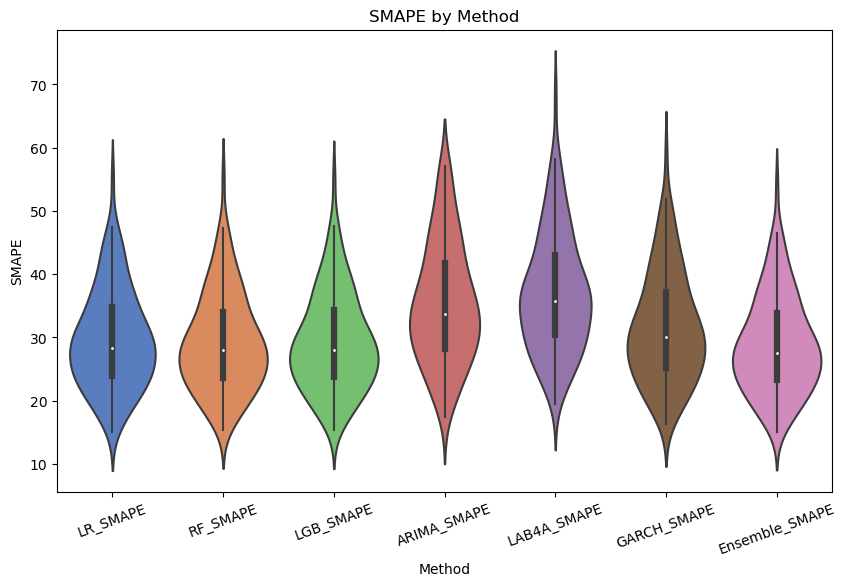

In [3]:
table = pd.read_csv('performance_table.csv')

# Group by 'stock_id' and calculate the mean of each SMAPE column
grouped = table.groupby('stock_id').agg({
    'LR_SMAPE': 'mean', 
    'RF_SMAPE': 'mean', 
    'LGB_SMAPE': 'mean', 
    'ARIMA_SMAPE': 'mean', 
    'LAB4A_SMAPE': 'mean', 
    'GARCH_SMAPE': 'mean', 
    'Ensemble_SMAPE': 'mean'
}).reset_index()

# Melt the dataframe to long format for plotting
grouped_long = pd.melt(grouped, id_vars=['stock_id'], 
                       value_vars=['LR_SMAPE', 'RF_SMAPE', 'LGB_SMAPE', 'ARIMA_SMAPE', 'LAB4A_SMAPE', 'GARCH_SMAPE', 'Ensemble_SMAPE'],
                       var_name='method', value_name='SMAPE')

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='method', y='SMAPE', data=grouped_long, palette='muted')
plt.xticks(rotation=20)
plt.title('SMAPE by Method')
plt.xlabel('Method')
plt.ylabel('SMAPE')
plt.show()


In [4]:
# Read another dataset
cluster_df = pd.read_csv("cluter_5.csv")

# Rename columns
cluster_df.columns = ["Average_Price_Change", "LR_SMAPE", "GARCH_SMAPE", "RF_SMAPE", "LGB_SMAPE", "ARIMA_SMAPE", "BASELINE_LR_SMAPE", "Ensemble_SMAPE"]

# Categorizing 'Average_Price_Change'
breaks = [-np.inf, 200, 250, 350, 450, np.inf]
labels = ["Low(136)", "Medium Low(215)", "Medium(299)", "Medium High(390)", "High(490)"]
cluster_df['Category'] = pd.cut(cluster_df['Average_Price_Change'], bins=breaks, labels=labels, right=False)

# Drop the 'ENSEMBLE_SMAPE' column
cluster_df = cluster_df.drop(columns='ENSEMBLE_SMAPE')

# Reshape the data to long format, excluding 'ENSEMBLE_SMAPE'
long_data = pd.melt(cluster_df, id_vars=['Category'], value_vars=['LR_SMAPE', 'GARCH_SMAPE', 'RF_SMAPE', 'LGB_SMAPE', 'ARIMA_SMAPE', 'BASELINE_LR_SMAPE'],
                    var_name='SMAPE_Type', value_name='SMAPE_Value')

# Plotting a multi-bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='SMAPE_Value', hue='SMAPE_Type', data=long_data, palette='deep')
plt.title('SMAPE Values by Category')
plt.xlabel('Cluster by Price Change')
plt.ylabel('Mean SMAPE Value')
plt.xticks(rotation=45)
plt.legend(title='SMAPE Types', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cluter_5.csv'

### Cluster

Clustering is used to optimize our models. Initially, we assume different models will have different performances under different clustered results. Implementing clusters aims to identify the best performance model under different clustered labels. Under this assumption, we can use the clustering feature to build a classifier to select the best model in prediction.
Firstly, we created some features, such as mean spread, price count change, etc.
After calculating these features, we did the correlation analysis with features and model performances measured by SMAPE. The correlation matrix is shown below.
(Correlation Matrix here)
As seen from the matrix, the features ‘price_change_count1’ and ‘price_change_count2’ have a significantly high correlation compared to others. We chose ‘price_change_count1’ as the cluster since our volatility prediction is determined by bid-ask price 1. We applied the K-means cluster with k = 3 and 5 for observation. The result is shown in the following bar chart.
(Bar chart here)
We found no significant differences among different models under the same clustered labels. Thus, there needs to be more evidence to optimize our models using the model selection method by clustering results. However, we find another trend in the bar chart, which shows that the higher price change count is related to better performance. According to this finding, we find another possible solution to optimize our model performance: finding another model to fit low-price-change-count situations. We have tried some naive models, such as interpolating with previous values, and some advanced methods, such as Exponentially Weighted Moving Average (EWMA), to smooth the training data with more changing prices (log returns). They didn’t show an outstanding result in the end.

At the end of the project, we decided to use the clustering features as a prediction risk acknowledgment level predictor in our final product.

### Methods of Evaluation

SMAPE is used as evaluation metric because it express the error in terms of
percentage, make it easy to interpret. Also, its denominator can filter extreme
values, prevent the issue of infinity which is common among MAPE.
Run through a loop of all stocks, we perform a 5-fold cross validation, for
each iteration, we train the model with 80 percent shuffled data, and use the
rest 20 percent data to make prediction, we record the prediction for these out
of fold data. Therefore, after the whole process, we have out of fold prediction
for every row of this stock’s data. We extend the process to all of our models
and all of our stocks, and merge the result, we finally collected a dataset
called performance table, record SMAPE for every time-id and every stock-id, and
the column name is different models.

Ensemble learning, which combines multiple models, enhances the robustness and accuracy of predictions by leveraging the strengths of various underlying algorithms. We utilized the Symmetric Mean Absolute Percentage Error (SMAPE) as our evaluation metric to provide a balanced view of prediction errors.

In our study, we evaluated the performance of several predictive models including a Baseline Linear Regression, Linear Regression, GARCH (1,1), Random Forest, ARIMA (3,1,1), LightGBM, and an Ensemble that integrates outputs from all these models.

Our analysis revealed that the Ensemble model, with the lowest SMAPE value of 28.8485, significantly outperformed the individual models in terms of accuracy. The Random Forest and LGB models also displayed strong performances with SMAPE scores closely trailing the Ensemble model, though their processing times varied considerably. On the other hand, the GARCH (1,1) and ARIMA (3,1,1) models, typically favored for time series forecasting, were outperformed by tree-based models in this instance. Notably, the processing time for the ARIMA model was higher, which could limit its practicality in scenarios that require rapid model retraining.

Overall, the use of ensemble learning in forecasting has shown to enhance performance markedly over individual models. This approach effectively captures the unique strengths of each model, leading to more accurate and robust predictions. The Ensemble model not only delivered improved accuracy but also maintained reasonable prediction times, making it well-suited for real-time forecasting applications. Looking ahead, further optimization of the ensemble components and their weights might yield even better results. Additionally, future efforts should explore the balance between processing time and accuracy to customize the ensemble approach for specific operational requirements.

## Discussion

### Shiny

The deployment process of the machine learning model, aimed at predicting stock volatility, was carefully executed to ensure seamless integration and usability within the Python based Shiny app (https://nithya7612.shinyapps.io/my-app/). The app provides traders with quick and accurate volatility forecasts for a range of stocks, enhancing their decision-making processes in dynamic financial markets.

The app mimics real-time streaming of data and provides access to the Optiver stock database, delivering an authentic trading experience. Currently, it includes 20 stock files, allowing users to select from these pre-loaded options. Due to Posit subscription plans, all 100 stock files could not be deployed on the free plan, so only 1GB worth of data was uploaded. Once a file is chosen, the app swiftly performs volatility predictions within approximately one second, ensuring minimal delay. Traders simply need to select the stock ID to receive one-minute ahead predictions, making it a highly efficient tool for rapid decision-making. This seamless process ensures that traders have timely and precise volatility data at their fingertips, enhancing their ability to react swiftly to market changes. Shiny for Python was used to design the prediction app. In order to deploy the app, the code:
`rsconnect deploy shiny ./dashboard/ --name nithya7612 –title my-app` was executed in the terminal. Rsconnect first verifies the connection to the Shiny server to ensure it reachable and verifies the app mode is compatible with the Shiny deployment requirements. When deploying a Shiny for Python application, the next step involves making a bundle. The deployment tool gathers all the necessary files from the application directory, including python scripts, data files and CSS scripts. The requirements.txt is file is parsed to identify all the dependencies required by the application. All this data is compressed into a single bundle file, to streamline the upload process by reducing the number of individual file transfers and includes all the metadata about the file.

The next stage is to deploy the bundle itself. The bundle is uploaded to the server and then unpacked. This involves decompressing the archive and extracting all the files appropriately. The server creates an environment for the application to run in, by installing all the files (python scripts etc.) and the required dependencies (requirements.txt). Images of the application are then pushed to the server. Following this, the server begins the staging phase preparing for deployment. A new instance of the
application if rolled forward and any old instances are terminated. The final stage confirms that the application runs as expected on the server by “Verifying Deploying Content”. A multidisciplinary approach was crucial to the development of the volatility prediction application, integrating finance, data science and human computer interactions. Finance underpins the app’s
purpose, ensuring it meets the financial needs and objectives of Optiver Option’s Traders. Data Science provides the models that were incorporated for the prediction and accuracies of the volatility prediction model. Human-Computer Interaction focuses on the optimising how options traders interact with the application ensuring a user-friendly interface.

### Future Work
Future work for the app involves continuously updating and improving the model and its predictive capabilities by training on data that is received throughout the day. Each night, once trading closes, the app will use latest stock data to create a new model ensuring the predictions are based on the most recent information. This approach guarantees that each day, the app operates with a freshly trained model, enhancing accuracy and relevance in the dynamic stock market environment. By prioritising more recent data, the model better captures the latest market trends and shifts, which have a greater impact on future volatility compared to significantly older data.


## References

Chen, C., Twycross, J., & Garibaldi, J. M. (2017, March 24). A new accuracy measure based on bounded relative error for time series forecasting. PloS one. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5365136/

Aslam, B., Bhuiyan, R. A., & Zhang, C. (2023, April 17). Portfolio construction with K-means clustering algorithm ... MATEC Web of Conferences. https://doi.org/10.1051/matecconf/202337702006

Mo, H. (2023, December). Comparative Analysis of Linear Regression, Polynomial Regression, and ARIMA Model for Short-term Stock Price Forecasting. Research Gate. 

https://www.researchgate.net/publication/376132695_Comparative_Analysis_of_Linear_Regression_Polynomial_Regression_and_ARIMA_Model_for_Short-term_Stock_Price_Forecasting

Sáenz , J. V., Quiroga, F. M., & Bariviera, A. (2023, April 22). Data vs. information: Using clustering techniques to enhance stock returns forecasting. International Review of Financial Analysis. https://www.sciencedirect.com/science/article/pii/S1057521923001734 

## Student Contribution

Mingxian: Did data preprocessing, feature engineering, coding for cross validation, random forest, linear regression.